# 2. Comprensión inicial del dataset 

In [1]:
import pandas as pd

df = pd.read_excel(
    '../data/raw/data_sales_forecasting.xlsx', 
    sheet_name='Base de Datos'
)

df.head()

,Fecha,No_Tienda,Codigo_Producto,Cantidad_Vendida,Venta_Neta_GTQ,Precio_Menu_GTQ,Codigo_Cupon,Descripcion_Cupon,Tipo_Orden,Tipo_Pago,Canal_Orden
0,2022-01-01,14000,12CL1I,1,57.40,159.0,CUPON005,Pizza mediana Especialidad + Adicional Q75.00,D,CR,Web
1,2022-01-01,14000,12CL1I,1,57.40,140.0,CUPON005,Pizza mediana Especialidad + Adicional Q75.00,D,CA,Web
2,2022-01-01,14000,12CL1I,1,53.57,60.0,NaN,NaN,C,CA,Phone
3,2022-01-01,14000,12CL1I,1,53.57,240.0,2OMASCC,2 o Mas CC,D,CR,Web
4,2022-01-01,14000,12CL1I,1,49.37,300.0,CUPON003,"Grande de Queso, 1 ING o Esp + Mediana de Ques...",D,CA,Web


In [2]:
print(df.shape)

print(f"El dataset tiene {df.shape[0]} filas y {df.shape[1]} columnas.")

(651372, 11)
El dataset tiene 651372 filas y 11 columnas.


In [3]:
print("\n--- Información de las Columnas ---")
df.info()


--- Información de las Columnas ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651372 entries, 0 to 651371
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Fecha              651372 non-null  datetime64[ns]
 1   No_Tienda          651372 non-null  int64         
 2   Codigo_Producto    651372 non-null  object        
 3   Cantidad_Vendida   651372 non-null  int64         
 4   Venta_Neta_GTQ     651372 non-null  float64       
 5   Precio_Menu_GTQ    651372 non-null  float64       
 6   Codigo_Cupon       581307 non-null  object        
 7   Descripcion_Cupon  581297 non-null  object        
 8   Tipo_Orden         651372 non-null  object        
 9   Tipo_Pago          651368 non-null  object        
 10  Canal_Orden        651372 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(6)
memory usage: 54.7+ MB


In [4]:
print("\n--- Rango Temporal de los Datos ---")

# 1. Convertir la columna de fecha a tipo datetime
df['Fecha'] = pd.to_datetime(df['Fecha'])

# 2. Encontrar la fecha mínima y máxima
fecha_minima = df['Fecha'].min()
fecha_maxima = df['Fecha'].max()

print(f"Fecha mínima: {fecha_minima.date()}")
print(f"Fecha máxima: {fecha_maxima.date()}")


--- Rango Temporal de los Datos ---
Fecha mínima: 2022-01-01
Fecha máxima: 2024-12-31


# 3. Validación de la estructura de los datos 

In [5]:
print("--- 1. Verificación de Tipos de Datos ---")

df.info()

--- 1. Verificación de Tipos de Datos ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651372 entries, 0 to 651371
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Fecha              651372 non-null  datetime64[ns]
 1   No_Tienda          651372 non-null  int64         
 2   Codigo_Producto    651372 non-null  object        
 3   Cantidad_Vendida   651372 non-null  int64         
 4   Venta_Neta_GTQ     651372 non-null  float64       
 5   Precio_Menu_GTQ    651372 non-null  float64       
 6   Codigo_Cupon       581307 non-null  object        
 7   Descripcion_Cupon  581297 non-null  object        
 8   Tipo_Orden         651372 non-null  object        
 9   Tipo_Pago          651368 non-null  object        
 10  Canal_Orden        651372 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(6)
memory usage: 54.7+ MB


In [6]:
print("\n--- 2. Validación de Frecuencia Temporal ---")


# Paso 1: Ordenar el DataFrame por la columna de fecha
df.sort_values(by='Fecha', inplace=True)

# Paso 2: Calcular las diferencias entre fechas consecutivas
deltas = df['Fecha'].diff()

# Paso 3: Mostrar las frecuencias (deltas) más comunes
print("\nFrecuencias de tiempo (deltas) más comunes en los datos:")
print(deltas.value_counts())


--- 2. Validación de Frecuencia Temporal ---

Frecuencias de tiempo (deltas) más comunes en los datos:
Fecha
0 days    650278
1 days      1091
2 days         2
Name: count, dtype: int64


In [7]:
print("\n--- 3. Verificación de Frecuencia (Días Únicos) ---")

# Contamos cuántos días únicos de operación hay
dias_unicos = df['Fecha'].dt.date.nunique()
print(f"Total de días únicos en el dataset: {dias_unicos}")

# Calculamos la diferencia de tiempo (delta) solo entre los días únicos
# 1. Obtenemos las fechas únicas
# 2. Las convertimos a solo fecha (sin hora)
# 3. Quitamos duplicados y calculamos la diferencia
deltas_dias_unicos = df['Fecha'].dt.date.drop_duplicates().diff()

print("\nFrecuencias (deltas) más comunes entre DÍAS ÚNICOS:")
print(deltas_dias_unicos.value_counts())


--- 3. Verificación de Frecuencia (Días Únicos) ---
Total de días únicos en el dataset: 1094

Frecuencias (deltas) más comunes entre DÍAS ÚNICOS:
Fecha
1 days    1091
2 days       2
Name: count, dtype: int64


# 4.  Análisis de valores faltantes y duplicados

In [8]:
print("--- 1. Conteo y Porcentaje de Valores Faltantes ---")

# Contar el total de nulos por columna
valores_faltantes = df.isnull().sum()

# Calcular el porcentaje de nulos por columna
porcentaje_faltantes = (df.isnull().sum() / len(df)) * 100

resumen_faltantes = pd.DataFrame({
    'Total Faltantes': valores_faltantes,
    'Porcentaje (%)': porcentaje_faltantes
})

print(resumen_faltantes[resumen_faltantes['Total Faltantes'] > 0].sort_values(by='Total Faltantes', ascending=False))

--- 1. Conteo y Porcentaje de Valores Faltantes ---
                   Total Faltantes  Porcentaje (%)
Descripcion_Cupon            70075       10.758061
Codigo_Cupon                 70065       10.756526
Tipo_Pago                        4        0.000614


In [9]:
# --- 1. Estrategia para Columnas de Cupón ---
valor_imputacion_cupon = 'Sin Cupon'

df.fillna({
    'Codigo_Cupon': valor_imputacion_cupon,
    'Descripcion_Cupon': valor_imputacion_cupon
}, inplace=True)

print(f"Valores nulos en 'Cupon' imputados con '{valor_imputacion_cupon}'.")


# --- 2. Estrategia para 'Tipo_Pago' ---
# Rellenar con el valor más frecuente (la moda)

# .mode()[0] obtiene el valor más frecuente
moda_tipo_pago = df['Tipo_Pago'].mode()[0] 

df['Tipo_Pago'].fillna(moda_tipo_pago, inplace=True)

print(f"Valores nulos en 'Tipo_Pago' imputados con la moda: '{moda_tipo_pago}'.")

# --- 3. Verificación Final ---
valores_faltantes_post = df.isnull().sum()
resumen_post = valores_faltantes_post[valores_faltantes_post > 0]

if resumen_post.empty:
    print("¡Perfecto! No quedan valores nulos en el dataset.")
else:
    print("Aún quedan valores nulos en las siguientes columnas:")
    print(resumen_post)

Valores nulos en 'Cupon' imputados con 'Sin Cupon'.
Valores nulos en 'Tipo_Pago' imputados con la moda: 'CA'.
¡Perfecto! No quedan valores nulos en el dataset.


C:\Users\gabri\AppData\Local\Temp\ipykernel_24824\36462471.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Tipo_Pago'].fillna(moda_tipo_pago, inplace=True)


In [10]:
print("--- 6. Conteo de Filas Duplicadas ---")

total_duplicados = df.duplicated().sum()

print(f"Total de filas duplicadas en el dataset: {total_duplicados}")

--- 6. Conteo de Filas Duplicadas ---
Total de filas duplicadas en el dataset: 160958


In [11]:
if total_duplicados > 0:
    df.drop_duplicates(inplace=True)
    
    print(f"\nSe eliminaron {total_duplicados} filas duplicadas.")
    print(f"Nuevo tamaño del dataset: {df.shape}")
else:
    print("\nNo se encontraron filas duplicadas.")


Se eliminaron 160958 filas duplicadas.
Nuevo tamaño del dataset: (490414, 11)


# 5.  Análisis descriptivo general 

In [12]:
print("--- Estadísticas Descriptivas (Venta_Neta_GTQ) ---")

print(df['Venta_Neta_GTQ'].describe())

print("\n--- Estadísticas Descriptivas (Cantidad_Vendida) ---")
print(df['Cantidad_Vendida'].describe())

--- Estadísticas Descriptivas (Venta_Neta_GTQ) ---
count    490414.000000
mean         57.708824
std          25.699759
min           0.090000
25%          44.640000
50%          53.570000
75%          65.810000
max        1928.570000
Name: Venta_Neta_GTQ, dtype: float64

--- Estadísticas Descriptivas (Cantidad_Vendida) ---
count    490414.000000
mean          1.090664
std           0.593059
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max          50.000000
Name: Cantidad_Vendida, dtype: float64


In [13]:
print("--- Distribución de Ventas por Producto (Top 10) ---")

ventas_por_producto = df.groupby('Descripcion_Cupon')['Venta_Neta_GTQ'].sum().sort_values(ascending=False)

print(ventas_por_producto.head(10))

--- Distribución de Ventas por Producto (Top 10) ---
Descripcion_Cupon
Mediana de Especialidad Q50                                        8793922.15
2 o Mas CC                                                         5780920.12
Sin Cupon                                                          3527636.03
Grande de Queso, 1 ING o Esp + Mediana de Queso,1ING o Esp Q129    2346706.09
Pizzas Medianas de Especialidad Q60                                1376113.32
Combo Domicilio Pizza Grande Esp                                   1290325.15
Pizza Grande Queso a Especialidad  Q80                              843105.68
Pizzas Medianas Esp Q60 C/U 2 o Mas                                 709468.04
Pizzas Grandes Esp Q80 C/U 2 o Mas                                  620366.32
Mediana de especialidad + orilla de queso por Q75                   602893.18
Name: Venta_Neta_GTQ, dtype: float64


In [14]:
print("\n--- Distribución de Ventas por Sucursal (Top 10) ---")

ventas_por_sucursal = df.groupby('No_Tienda')['Venta_Neta_GTQ'].sum().sort_values(ascending=False)

print(ventas_por_sucursal.head(10))


--- Distribución de Ventas por Sucursal (Top 10) ---
No_Tienda
14010    8036241.30
14000    5946909.96
14001    5921179.99
14002    4292516.16
14012    4104367.84
Name: Venta_Neta_GTQ, dtype: float64


In [15]:
print("\n--- Distribución de Ventas por Periodo de Tiempo ---")

# Agregación por Día 
ventas_por_dia = df.groupby(pd.Grouper(key='Fecha', freq='D'))['Venta_Neta_GTQ'].sum()
print("\nVentas totales por Día (primeros 5 días):")
print(ventas_por_dia.head())


# Agregación por Mes
ventas_por_mes = df.groupby(pd.Grouper(key='Fecha', freq='M'))['Venta_Neta_GTQ'].sum()
print("\nVentas totales por Mes:")
print(ventas_por_mes.head())


# Agregación por Año
ventas_por_anio = df.groupby(pd.Grouper(key='Fecha', freq='Y'))['Venta_Neta_GTQ'].sum()
print("\nVentas totales por Año:")
print(ventas_por_anio)


--- Distribución de Ventas por Periodo de Tiempo ---

Ventas totales por Día (primeros 5 días):
Fecha
2022-01-01    34719.97
2022-01-02    35097.72
2022-01-03    17395.31
2022-01-04    18963.66
2022-01-05    19242.43
Freq: D, Name: Venta_Neta_GTQ, dtype: float64

Ventas totales por Mes:
Fecha
2022-01-31    782426.61
2022-02-28    747224.70
2022-03-31    773878.32
2022-04-30    818838.11
2022-05-31    867274.42
Freq: ME, Name: Venta_Neta_GTQ, dtype: float64

Ventas totales por Año:
Fecha
2022-12-31    10526771.27
2023-12-31     8947393.43
2024-12-31     8827050.55
Freq: YE-DEC, Name: Venta_Neta_GTQ, dtype: float64


C:\Users\gabri\AppData\Local\Temp\ipykernel_24824\3240162208.py:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ventas_por_mes = df.groupby(pd.Grouper(key='Fecha', freq='M'))['Venta_Neta_GTQ'].sum()
C:\Users\gabri\AppData\Local\Temp\ipykernel_24824\3240162208.py:16: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ventas_por_anio = df.groupby(pd.Grouper(key='Fecha', freq='Y'))['Venta_Neta_GTQ'].sum()


# 6. Exploración temporal 

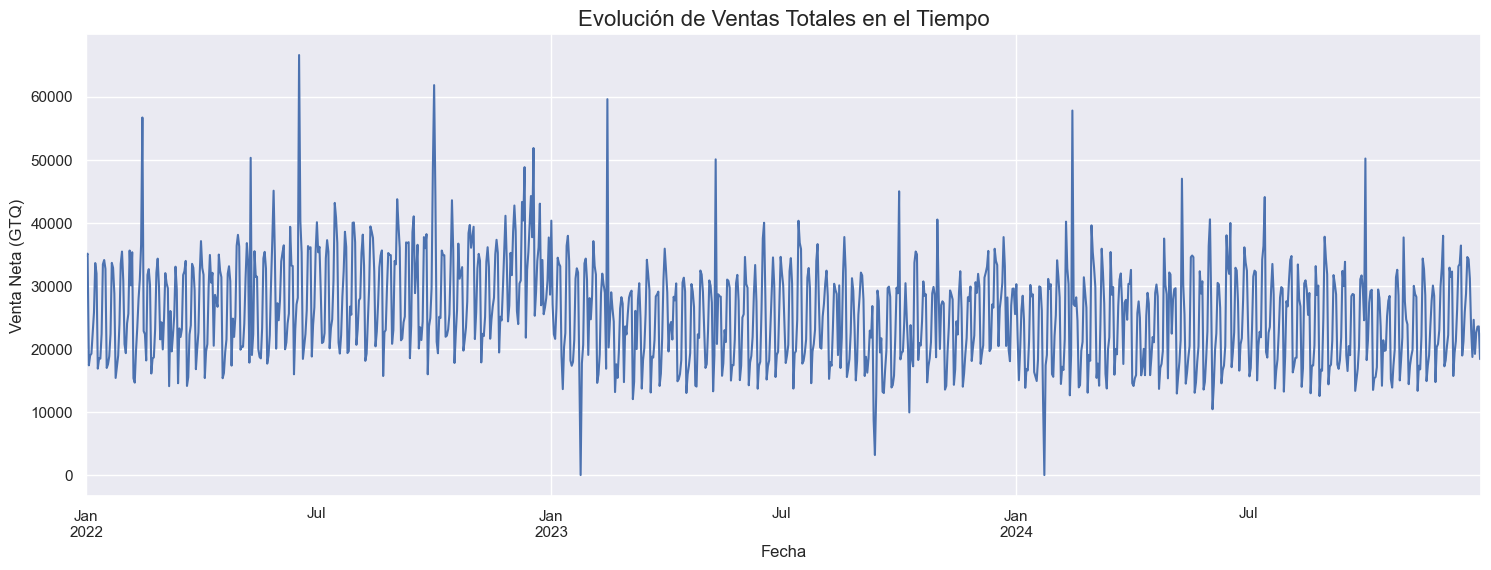

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="darkgrid")

# --- Gráfica de Serie Temporal (Ventas Diarias) ---

ventas_por_dia = df.groupby(pd.Grouper(key='Fecha', freq='D'))['Venta_Neta_GTQ'].sum()

plt.figure(figsize=(18, 6))
ventas_por_dia.plot()

plt.title('Evolución de Ventas Totales en el Tiempo', fontsize=16)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Venta Neta (GTQ)', fontsize=12)
plt.show()

## b. Identificación de Patrones

Basado en la gráfica "Evolución de Ventas Totales en el Tiempo", se pueden identificar los siguientes patrones:

### i. Tendencia
No se observa una tendencia clara a largo plazo (ni positiva ni negativa). Las ventas parecen mantenerse **estables** a lo largo de los tres años, oscilando alrededor de un promedio constante, aunque con mucha volatilidad diaria.

### ii. Estacionalidad
Se observa un **fuerte patrón de estacionalidad anual**. Claramente, hay picos de ventas muy altos que se repiten cada año, probablemente coincidiendo con días festivos o temporadas de alta demanda (como fin de año).

### iii. Picos o Caídas Abruptas
* **Picos:** Existen numerosos picos abruptos a lo largo del año, destacando los picos estacionales mencionados.
* **Caídas:** Se observa una **caída abrupta y muy notable** (donde las ventas caen casi a cero) aproximadamente en el primer trimestre de 2023. Esto podría coincidir con un evento externo significativo (como el inicio de cierres por pandemia o un evento similar) que interrumpió la operación normal.

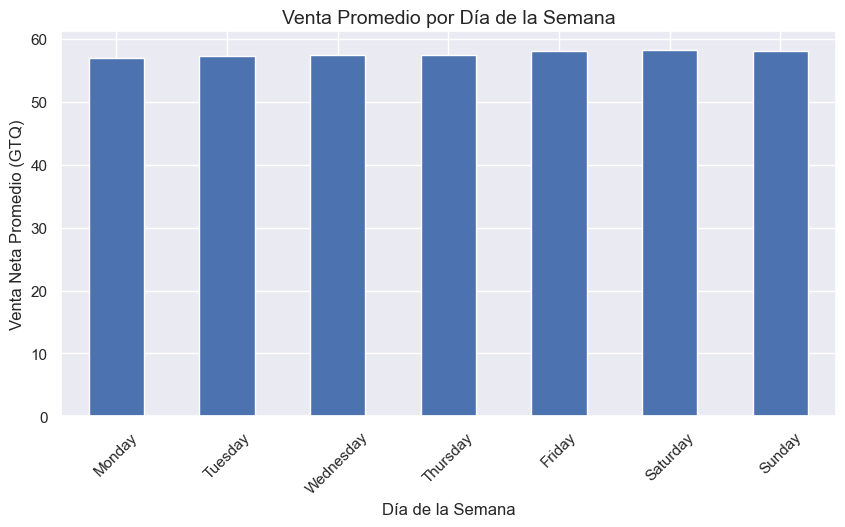

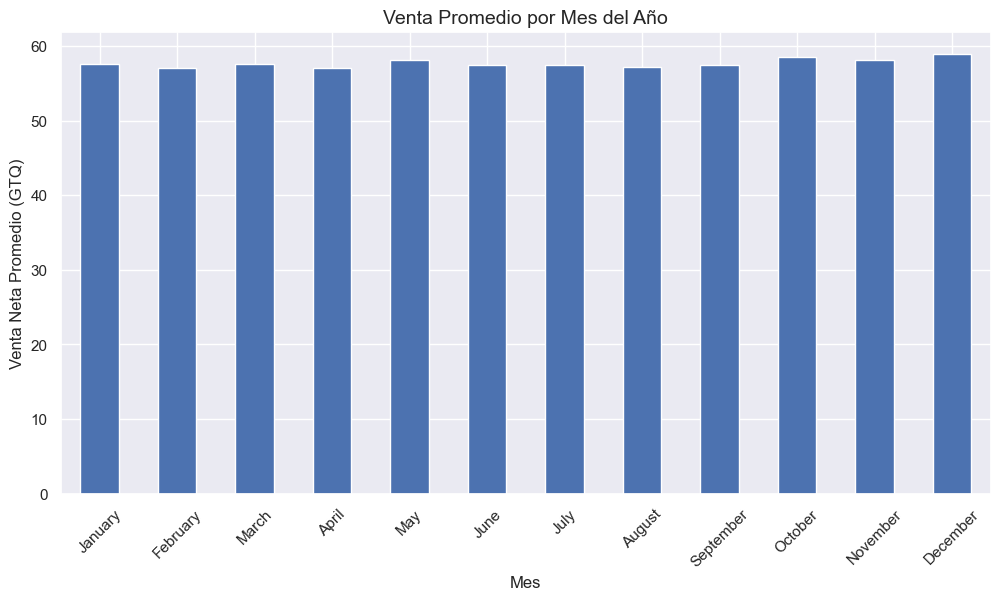

In [17]:
# --- 1. Análisis por Día de la Semana ---

df['Dia_Semana'] = df['Fecha'].dt.day_name()
df['Mes'] = df['Fecha'].dt.month_name()

dias_ordenados = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

ventas_dia_semana = df.groupby('Dia_Semana')['Venta_Neta_GTQ'].mean().reindex(dias_ordenados)

plt.figure(figsize=(10, 5))
ventas_dia_semana.plot(kind='bar')
plt.title('Venta Promedio por Día de la Semana', fontsize=14)
plt.xlabel('Día de la Semana')
plt.ylabel('Venta Neta Promedio (GTQ)')
plt.xticks(rotation=45)
plt.show()


# --- 2. Análisis por Mes del Año ---

meses_ordenados = ["January", "February", "March", "April", "May", "June", 
                   "July", "August", "September", "October", "November", "December"]

ventas_por_mes = df.groupby('Mes')['Venta_Neta_GTQ'].mean().reindex(meses_ordenados)

plt.figure(figsize=(12, 6))
ventas_por_mes.plot(kind='bar')
plt.title('Venta Promedio por Mes del Año', fontsize=14)
plt.xlabel('Mes')
plt.ylabel('Venta Neta Promedio (GTQ)')
plt.xticks(rotation=45)
plt.show()

## iv. Análisis de Ciclos (Día de la Semana y Mes del Año)

### Análisis por Día de la Semana

La gráfica "Venta Promedio por Día de la Semana" muestra un patrón cíclico semanal muy claro:

* **Picos de Venta:** Las ventas promedio aumentan significativamente durante el fin de semana, alcanzando su punto máximo el **domingo** y seguido de cerca por el **sábado**.
* **Ventas Bajas:** Las ventas son considerablemente más bajas durante los días de semana, tocando su punto más bajo el **martes**.
* **Conclusión:** Existe un fuerte ciclo semanal donde la demanda se concentra en los fines de semana.

### Análisis por Mes del Año

La gráfica "Venta Promedio por Mes del Año" revela la estacionalidad mensual de las ventas:

* **Temporada Alta:** Se observa un pico muy pronunciado en **diciembre**, lo que indica una fuerte temporada de fin de año.
* **Temporada Baja:** Los meses de **enero** y **febrero** muestran las ventas promedio más bajas, lo que sugiere una caída post-fiestas.
* **Picos Secundarios:** Hay picos menores en meses como **mayo** y **agosto**, lo que podría estar relacionado con festividades o temporadas de promociones específicas.

# 7. Análisis comparativo entre sucursales y productos 


In [18]:
print("--- a. Análisis de Rendimiento de Productos ---")

# Agrupamos por la descripción del producto (cupón)
product_performance = df.groupby('Descripcion_Cupon').agg(
    Total_Vendido=('Cantidad_Vendida', 'sum'),
    Ingresos_Totales=('Venta_Neta_GTQ', 'sum')
)

# --- Productos MÁS vendidos (por Ingresos) ---
print("\n--- Top 10 Productos MÁS Vendidos (por Ingresos) ---")
print(product_performance.sort_values(by='Ingresos_Totales', ascending=False).head(10))

# --- Productos MENOS vendidos (por Ingresos) ---
print("\n--- Top 10 Productos MENOS Vendidos (por Ingresos) ---")
print(product_performance.sort_values(by='Ingresos_Totales', ascending=True).head(10))

--- a. Análisis de Rendimiento de Productos ---

--- Top 10 Productos MÁS Vendidos (por Ingresos) ---
                                                    Total_Vendido  \
Descripcion_Cupon                                                   
Mediana de Especialidad Q50                                193052   
2 o Mas CC                                                  94971   
Sin Cupon                                                   60731   
Grande de Queso, 1 ING o Esp + Mediana de Queso...          42489   
Pizzas Medianas de Especialidad Q60                         25499   
Combo Domicilio Pizza Grande Esp                            16205   
Pizza Grande Queso a Especialidad  Q80                      11873   
Pizzas Medianas Esp Q60 C/U 2 o Mas                         13214   
Pizzas Grandes Esp Q80 C/U 2 o Mas                           8786   
Mediana de especialidad + orilla de queso por Q75           10119   

                                                    Ingresos_Totales 


--- b. Comparativa de Desempeño entre Sucursales ---

Resumen de Desempeño por Sucursal:
           Total_Ventas  Venta_Promedio  Total_Transacciones
No_Tienda                                                   
14010        8036241.30       58.886505               136470
14000        5946909.96       58.190082               102198
14001        5921179.99       56.761410               104317
14002        4292516.16       57.619213                74498
14012        4104367.84       56.277411                72931


C:\Users\gabri\AppData\Local\Temp\ipykernel_24824\719397526.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


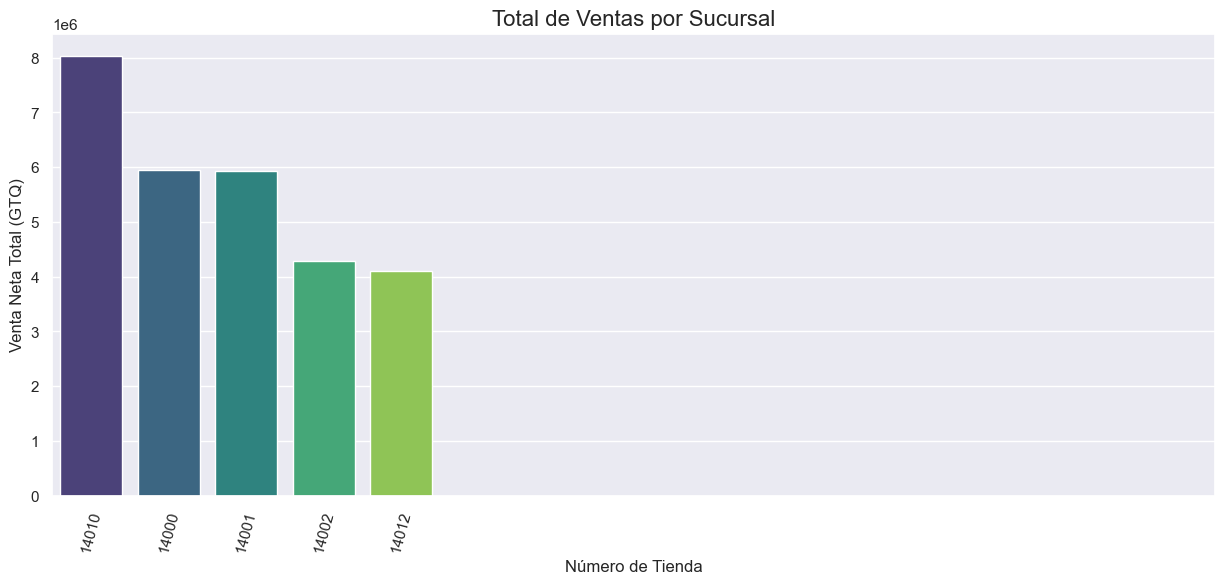

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

print("\n--- b. Comparativa de Desempeño entre Sucursales ---")

# Agrupamos por tienda y calculamos métricas clave
branch_performance = df.groupby('No_Tienda').agg(
    Total_Ventas=('Venta_Neta_GTQ', 'sum'),
    Venta_Promedio=('Venta_Neta_GTQ', 'mean'),
    Total_Transacciones=('Venta_Neta_GTQ', 'count')
)

# Ordenamos por ventas totales
branch_performance = branch_performance.sort_values(by='Total_Ventas', ascending=False)

print("\nResumen de Desempeño por Sucursal:")
print(branch_performance.head())

# --- Gráfica: Total de Ventas por Sucursal (Top 15) ---
plt.figure(figsize=(15, 6))
sns.barplot(
    x=branch_performance.index.astype(str), 
    y=branch_performance['Total_Ventas'],
    order=branch_performance.index,
    palette='viridis'
)
plt.title('Total de Ventas por Sucursal', fontsize=16)
plt.xlabel('Número de Tienda', fontsize=12)
plt.ylabel('Venta Neta Total (GTQ)', fontsize=12)
plt.xticks(rotation=75)
plt.xlim(-0.5, 14.5) 
plt.show()


--- c. Detección de Outliers (Anomalías) ---


C:\Users\gabri\AppData\Local\Temp\ipykernel_24824\1948120919.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


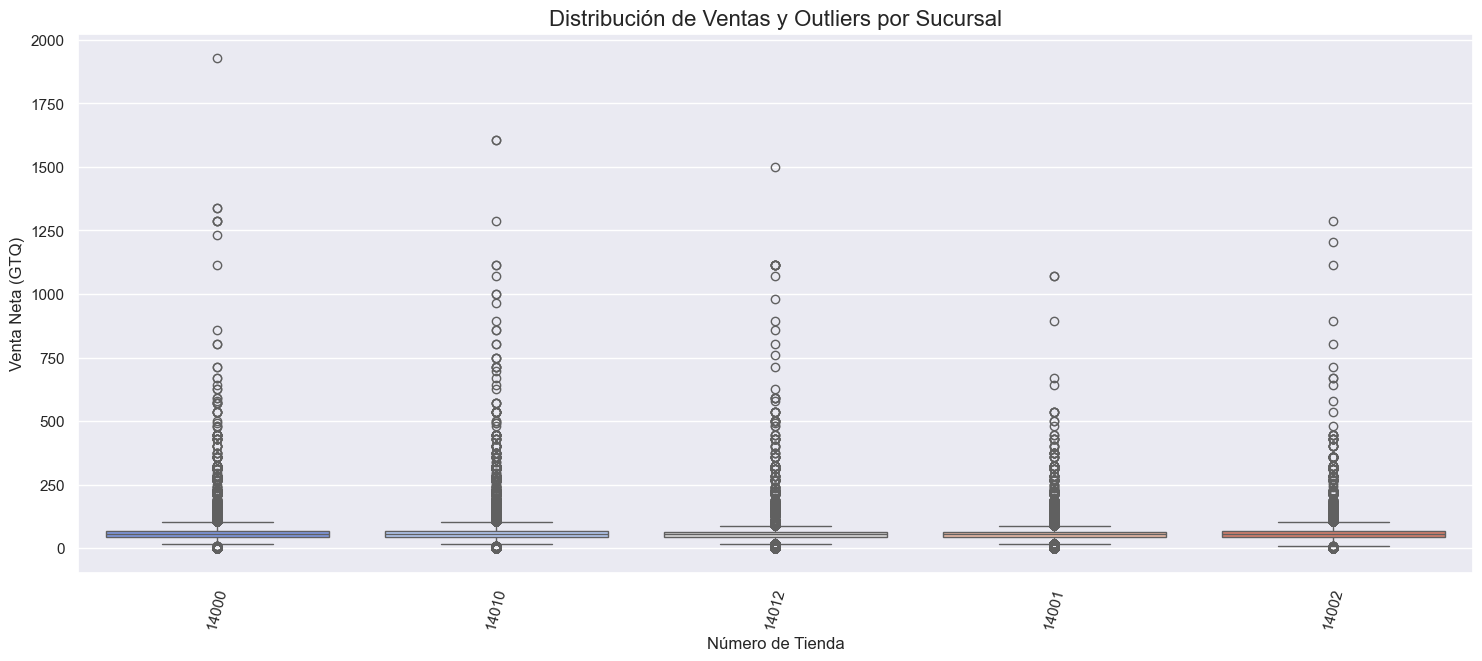

C:\Users\gabri\AppData\Local\Temp\ipykernel_24824\1948120919.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


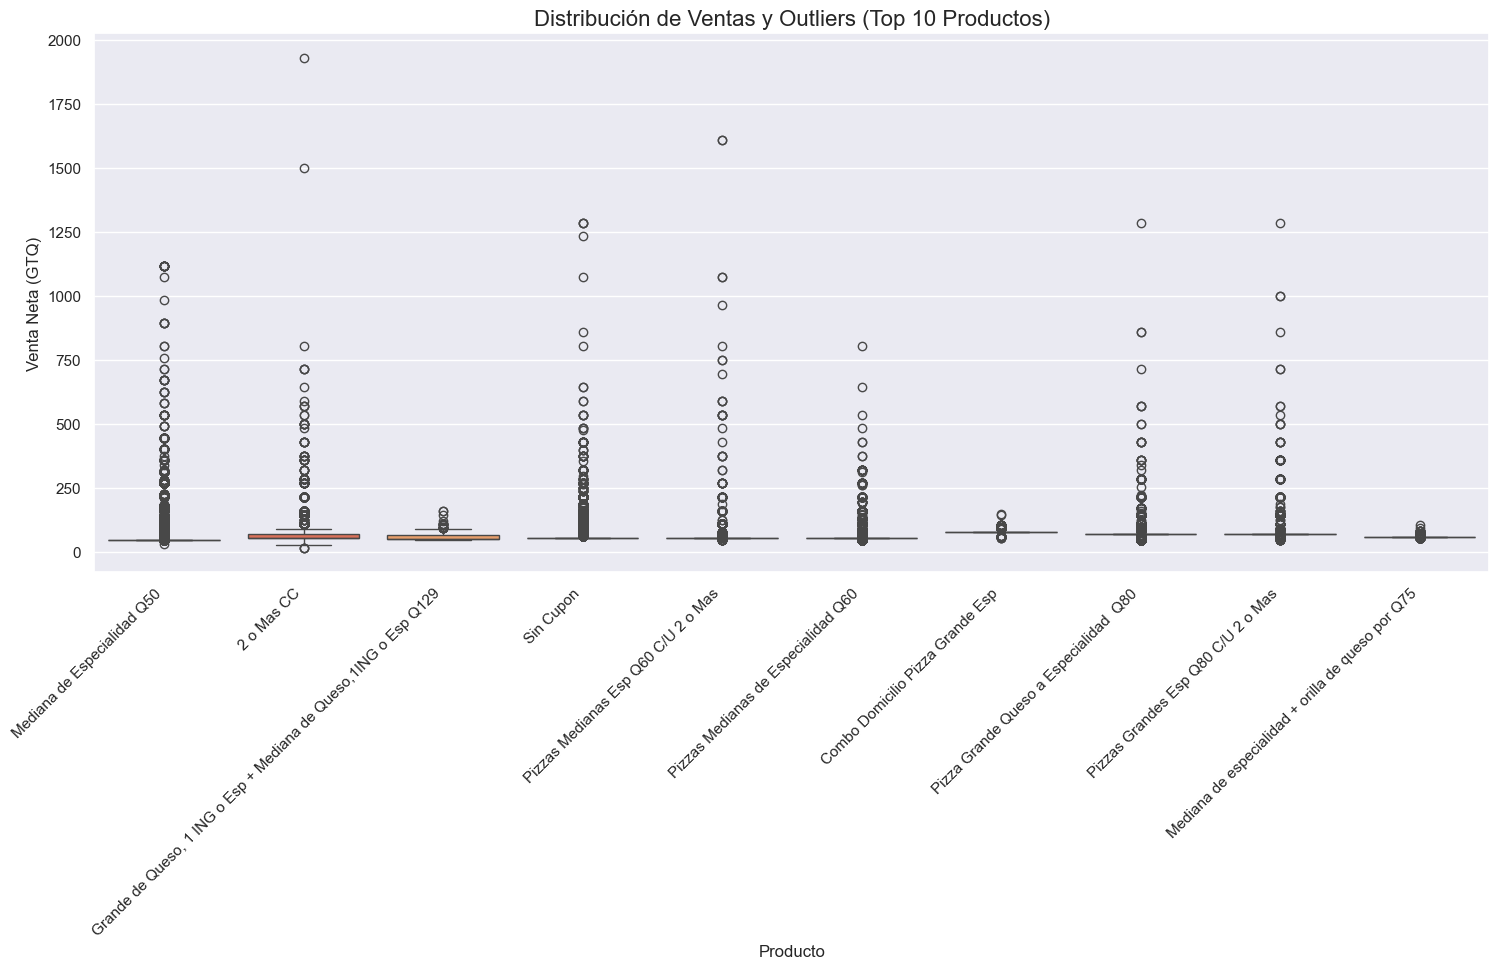

In [20]:
print("\n--- c. Detección de Outliers (Anomalías) ---")

# --- 1. Outliers por Sucursal ---
plt.figure(figsize=(18, 7))
sns.boxplot(
    data=df,
    x=df['No_Tienda'].astype(str),  
    y='Venta_Neta_GTQ',
    palette='coolwarm'
)
plt.title('Distribución de Ventas y Outliers por Sucursal', fontsize=16)
plt.xlabel('Número de Tienda', fontsize=12)
plt.ylabel('Venta Neta (GTQ)', fontsize=12)
plt.xticks(rotation=75)
plt.show()

# --- 2. Outliers por Producto (Top 10) ---

# Obtenemos la lista del Top 10 de productos que calculamos antes
top_10_products = product_performance.sort_values(by='Ingresos_Totales', ascending=False).head(10).index

# Filtramos el DataFrame original para quedarnos SOLO con las ventas de esos 10 productos
df_top10_products = df[df['Descripcion_Cupon'].isin(top_10_products)]

# Graficamos el box plot de esos 10 productos
plt.figure(figsize=(18, 7))
sns.boxplot(
    data=df_top10_products,
    x='Descripcion_Cupon',
    y='Venta_Neta_GTQ',
    palette='Spectral'
)
plt.title('Distribución de Ventas y Outliers (Top 10 Productos)', fontsize=16)
plt.xlabel('Producto', fontsize=12)
plt.ylabel('Venta Neta (GTQ)', fontsize=12)
plt.xticks(rotation=45, ha='right') 
plt.show()

# 8. Visualizaciones clave (obligatorias) 

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="darkgrid")

--- a. Serie de Tiempo de Ventas Totales ---


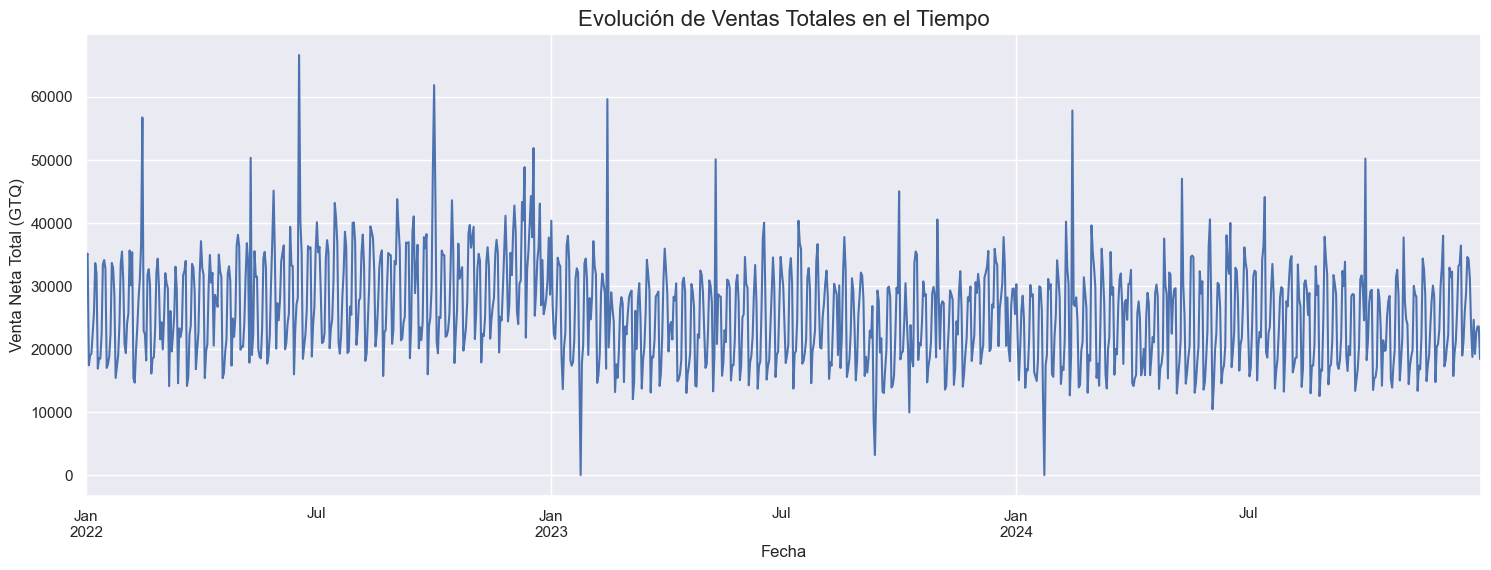

In [22]:
print("--- a. Serie de Tiempo de Ventas Totales ---")

# 1. Calculamos las ventas totales por día
ventas_por_dia = df.groupby(pd.Grouper(key='Fecha', freq='D'))['Venta_Neta_GTQ'].sum()

# 2. Graficamos la serie de tiempo
plt.figure(figsize=(18, 6))
ventas_por_dia.plot()

plt.title('Evolución de Ventas Totales en el Tiempo', fontsize=16)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Venta Neta Total (GTQ)', fontsize=12)
plt.show()


--- b. Gráfico de Barras: Ventas por Sucursal (Top 15) ---


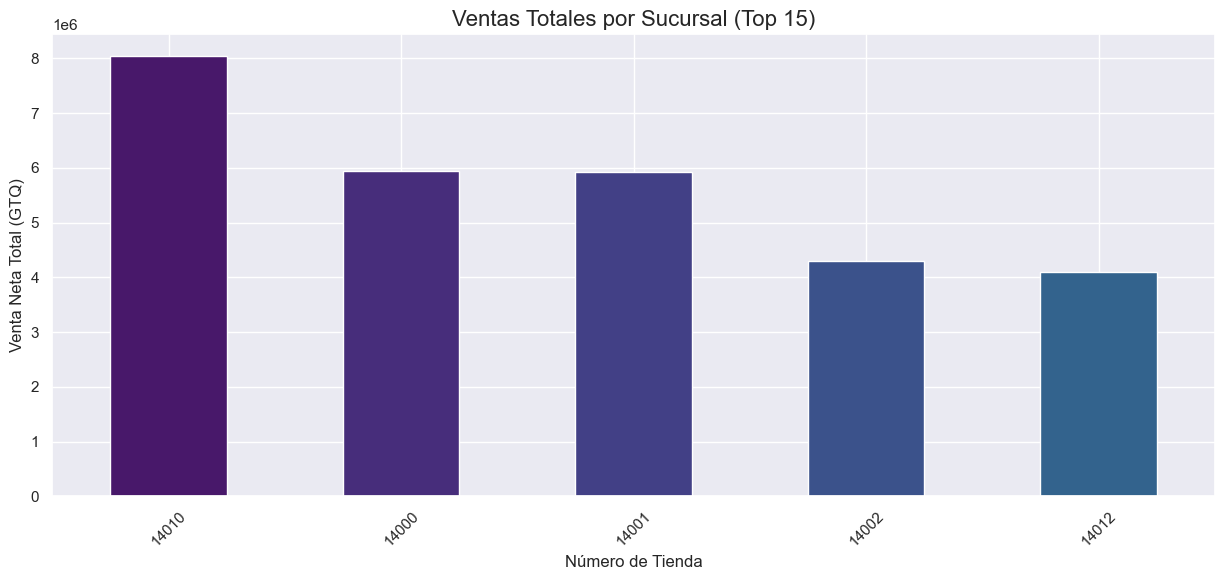

In [23]:
print("\n--- b. Gráfico de Barras: Ventas por Sucursal (Top 15) ---")

# 1. Agrupamos por sucursal, sumamos las ventas y ordenamos
ventas_por_sucursal = df.groupby('No_Tienda')['Venta_Neta_GTQ'].sum().sort_values(ascending=False)

# 2. Tomamos solo las 15 primeras para que la gráfica sea legible
top_15_sucursales = ventas_por_sucursal.head(15)

# 3. Graficamos
plt.figure(figsize=(15, 6))
top_15_sucursales.plot(kind='bar', color=sns.color_palette('viridis', 15))

plt.title('Ventas Totales por Sucursal (Top 15)', fontsize=16)
plt.xlabel('Número de Tienda', fontsize=12)
plt.ylabel('Venta Neta Total (GTQ)', fontsize=12)
plt.xticks(rotation=45)
plt.show()


--- c. Gráfico de Barras: Ventas por Producto (Top 15) ---


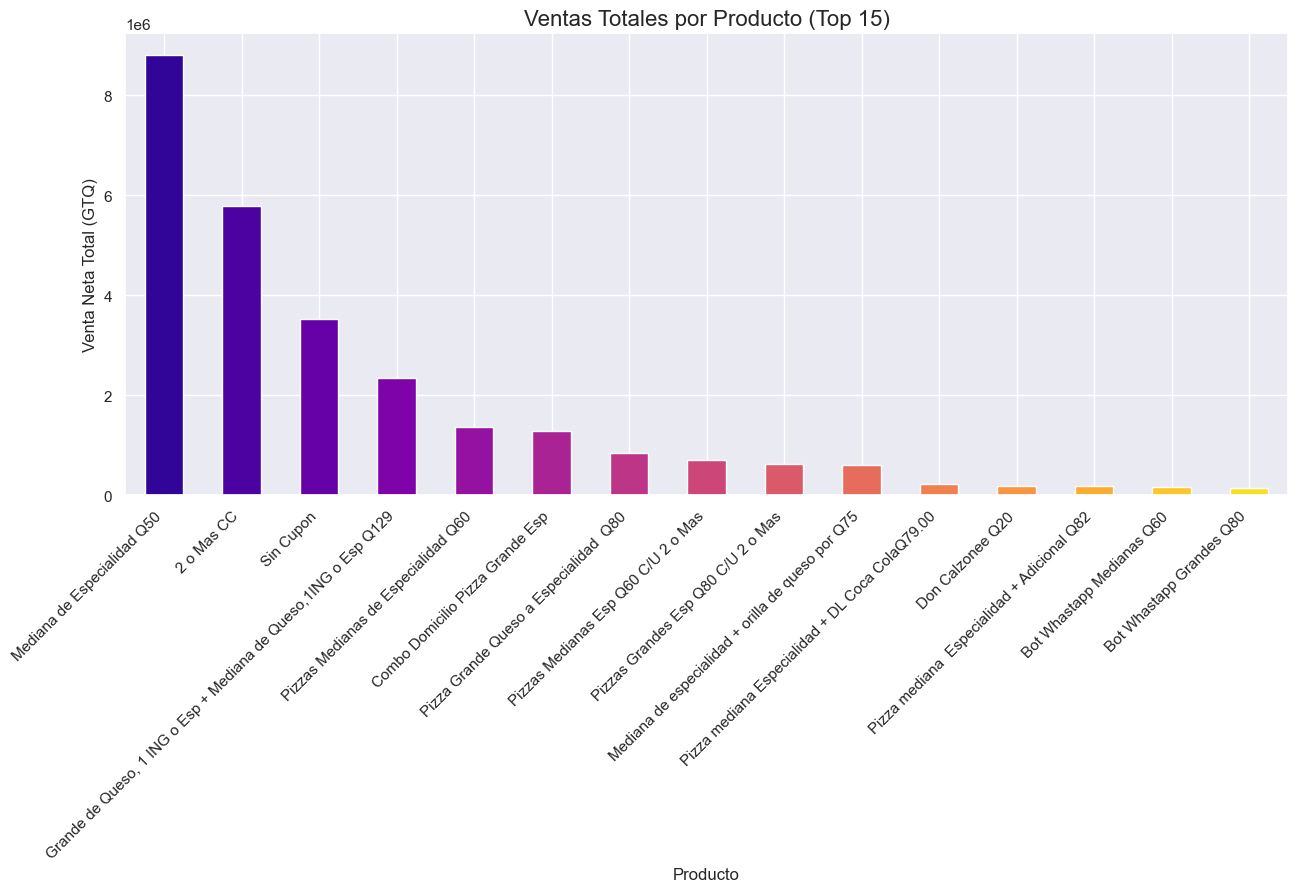

In [24]:
print("\n--- c. Gráfico de Barras: Ventas por Producto (Top 15) ---")

# 1. Agrupamos por producto, sumamos las ventas y ordenamos
ventas_por_producto = df.groupby('Descripcion_Cupon')['Venta_Neta_GTQ'].sum().sort_values(ascending=False)

# 2. Tomamos los 15 primeros
top_15_productos = ventas_por_producto.head(15)

# 3. Graficamos
plt.figure(figsize=(15, 6))
top_15_productos.plot(kind='bar', color=sns.color_palette('plasma', 15))

plt.title('Ventas Totales por Producto (Top 15)', fontsize=16)
plt.xlabel('Producto', fontsize=12)
plt.ylabel('Venta Neta Total (GTQ)', fontsize=12)
plt.xticks(rotation=45, ha='right') 
plt.show()


--- d. Heatmap: Ventas Mensuales por Sucursal ---


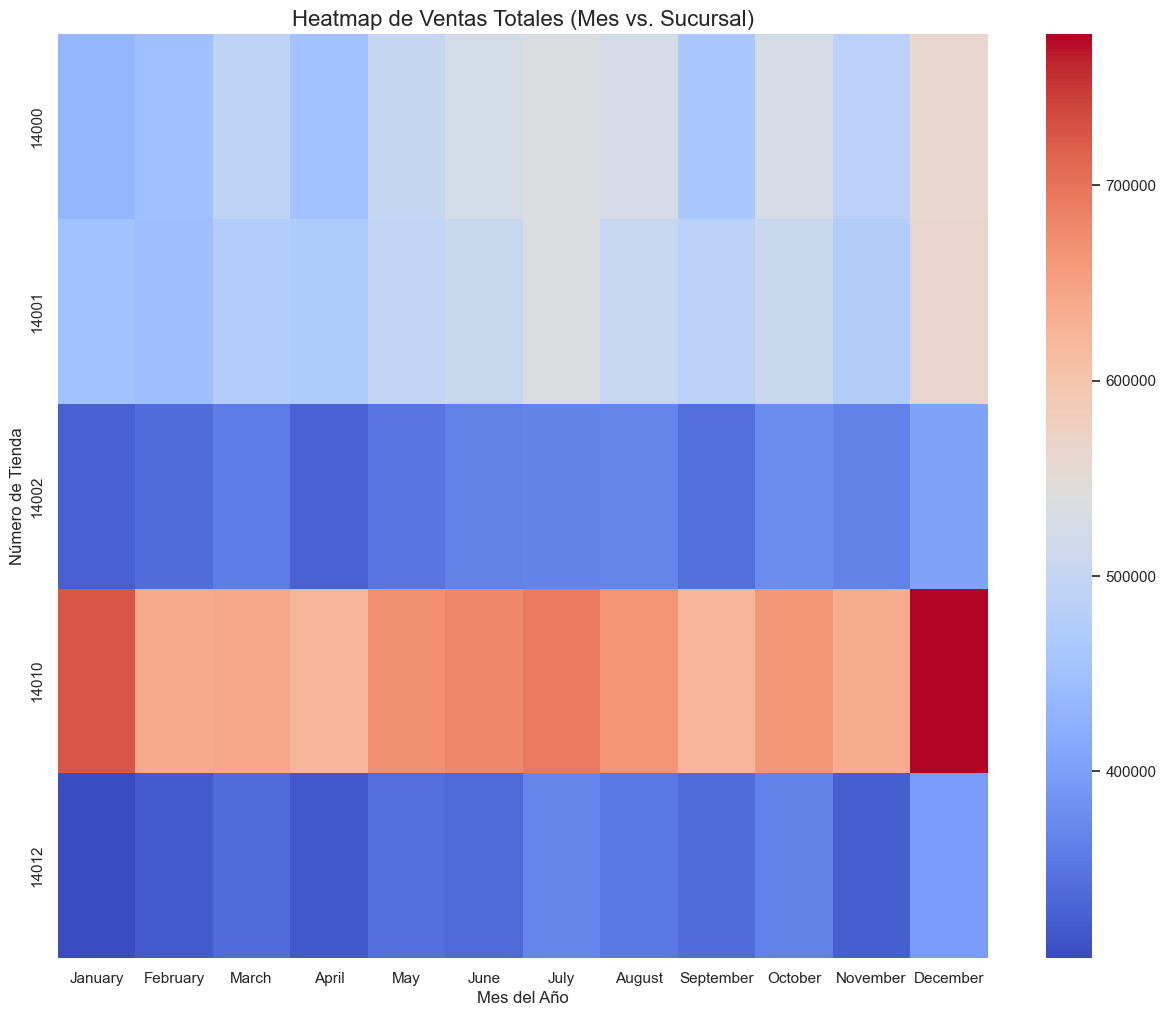

In [25]:
print("\n--- d. Heatmap: Ventas Mensuales por Sucursal ---")

# 1. Extraemos el nombre del mes para usarlo como columna
df['Mes_Nombre'] = df['Fecha'].dt.month_name()

# 2. Creamos un orden correcto para los meses
meses_ordenados = ["January", "February", "March", "April", "May", "June", 
                   "July", "August", "September", "October", "November", "December"]

# 3. Creamos una tabla pivote
heatmap_data = df.groupby(['No_Tienda', 'Mes_Nombre'])['Venta_Neta_GTQ'].sum().unstack()

# 4. Ordenamos las columnas (meses) en orden cronológico
heatmap_data = heatmap_data.reindex(columns=meses_ordenados)

# 5. Graficamos el Heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(
    heatmap_data, 
    annot=False,     
    cmap='coolwarm'  
)

plt.title('Heatmap de Ventas Totales (Mes vs. Sucursal)', fontsize=16)
plt.xlabel('Mes del Año', fontsize=12)
plt.ylabel('Número de Tienda', fontsize=12)
plt.show()

# 9. Para cada serie temporal específica (ventas totales, ventas por sucursal, ventas por producto y ventas por sucursal-producto).

--- a.i. ACF de Ventas Totales Diarias ---


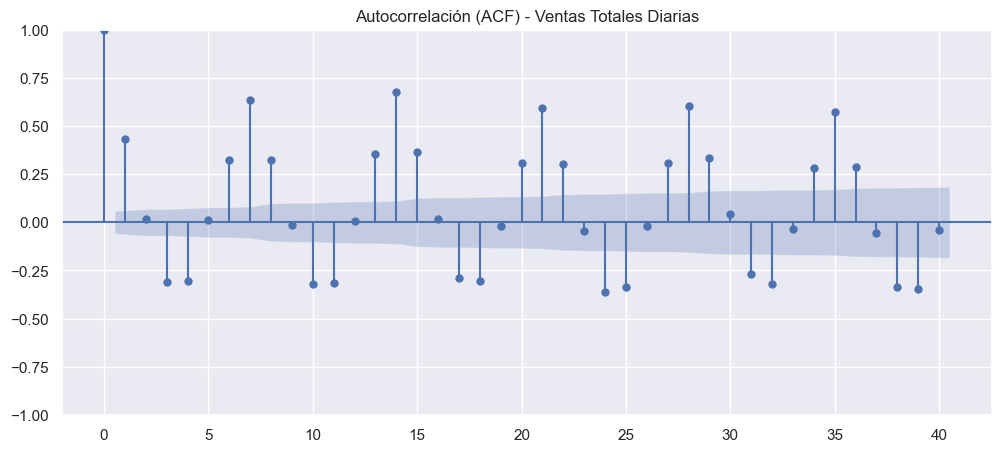


--- a.i. ACF de Ventas Diarias (Top Sucursal) ---


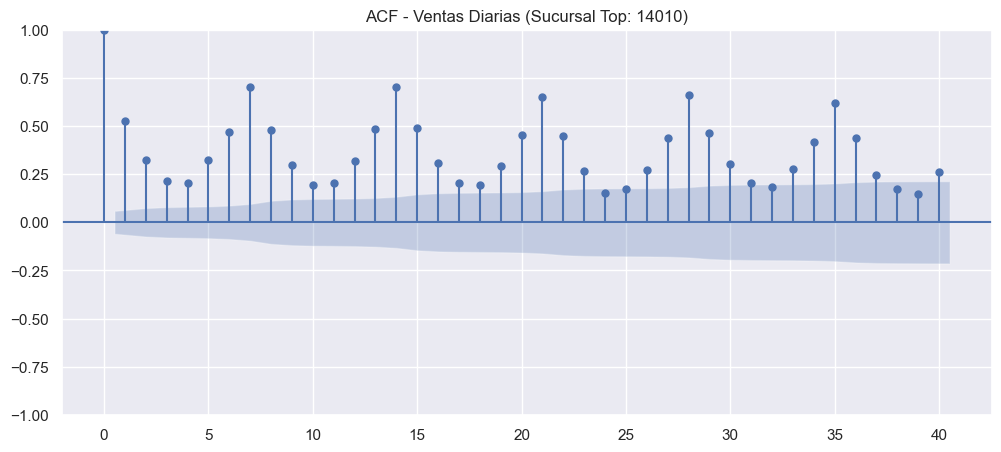


--- a.i. ACF de Ventas Diarias (Top Producto) ---


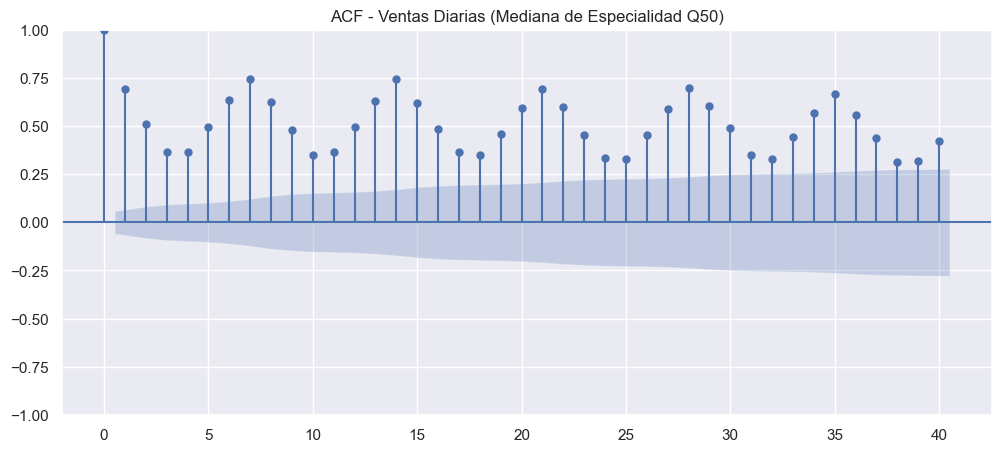


--- a.i. ACF (Sucursal Top: 14010 + Producto Top: Mediana de Especialidad Q50) ---


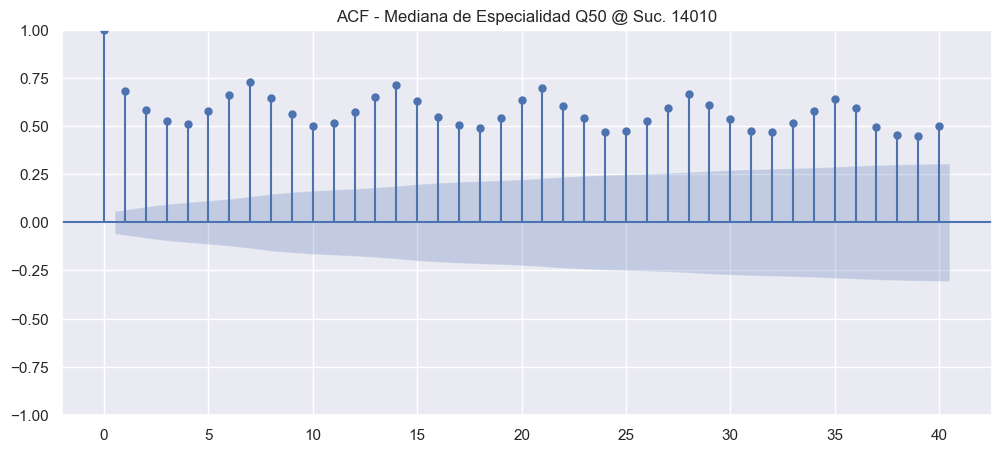

In [28]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
import pandas as pd

# --- 1. ACF para Ventas Totales ---
print("--- a.i. ACF de Ventas Totales Diarias ---")
ventas_por_dia = df.groupby(pd.Grouper(key='Fecha', freq='D'))['Venta_Neta_GTQ'].sum()

# Creamos la figura y el eje para el gráfico
fig, ax = plt.subplots(figsize=(12, 5))
# Graficamos el ACF para 40 rezagos (lags)
plot_acf(ventas_por_dia, lags=40, ax=ax)
ax.set_title('Autocorrelación (ACF) - Ventas Totales Diarias')
plt.show()


# --- 2. ACF para la Sucursal MÁS Vendida ---
print("\n--- a.i. ACF de Ventas Diarias (Top Sucursal) ---")
# 2.1 Encontrar la sucursal top
ventas_por_sucursal = df.groupby('No_Tienda')['Venta_Neta_GTQ'].sum().sort_values(ascending=False)
top_sucursal_id = ventas_por_sucursal.index[0]

# 2.2 Crear la serie temporal solo para esa sucursal
df_top_sucursal = df[df['No_Tienda'] == top_sucursal_id]
ventas_top_sucursal_dia = df_top_sucursal.groupby(pd.Grouper(key='Fecha', freq='D'))['Venta_Neta_GTQ'].sum()

# 2.3 Graficar ACF
fig, ax = plt.subplots(figsize=(12, 5))
plot_acf(ventas_top_sucursal_dia, lags=40, ax=ax)
ax.set_title(f'ACF - Ventas Diarias (Sucursal Top: {top_sucursal_id})')
plt.show()


# --- 3. ACF para el Producto MÁS Vendido ---
print("\n--- a.i. ACF de Ventas Diarias (Top Producto) ---")
# 3.1 Encontrar el producto top
ventas_por_producto = df.groupby('Descripcion_Cupon')['Venta_Neta_GTQ'].sum().sort_values(ascending=False)
top_producto_nombre = ventas_por_producto.index[0]

# 3.2 Crear la serie temporal solo para ese producto
df_top_producto = df[df['Descripcion_Cupon'] == top_producto_nombre]
ventas_top_producto_dia = df_top_producto.groupby(pd.Grouper(key='Fecha', freq='D'))['Venta_Neta_GTQ'].sum()

# 3.3 Graficar ACF
fig, ax = plt.subplots(figsize=(12, 5))
plot_acf(ventas_top_producto_dia, lags=40, ax=ax)
ax.set_title(f'ACF - Ventas Diarias ({top_producto_nombre})')
plt.show()


# --- 4. ACF para la Combinación Top (Sucursal-Producto) ---
print(f"\n--- a.i. ACF (Sucursal Top: {top_sucursal_id} + Producto Top: {top_producto_nombre}) ---")
# 4.1 Filtrar el df original por la combinación top
df_top_combo = df[
    (df['No_Tienda'] == top_sucursal_id) &
    (df['Descripcion_Cupon'] == top_producto_nombre)
]

# 4.2 Crear la serie temporal para esa combinación
ventas_top_combo_dia = df_top_combo.groupby(pd.Grouper(key='Fecha', freq='D'))['Venta_Neta_GTQ'].sum()

# 4.3 Graficar ACF
fig, ax = plt.subplots(figsize=(12, 5))
plot_acf(ventas_top_combo_dia, lags=40, ax=ax)
ax.set_title(f'ACF - {top_producto_nombre} @ Suc. {top_sucursal_id}')
plt.show()

--- a.ii. PACF de Ventas Totales Diarias ---


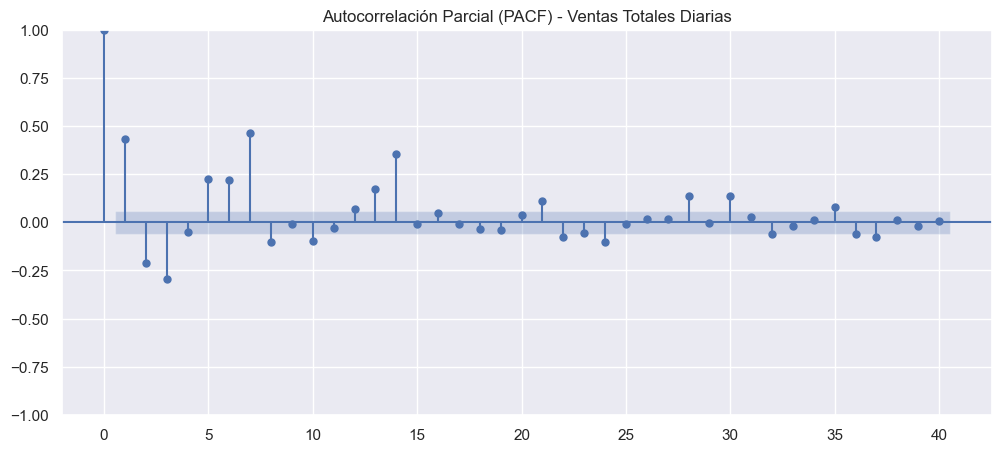


--- a.ii. PACF de Ventas Diarias (Top Sucursal) ---


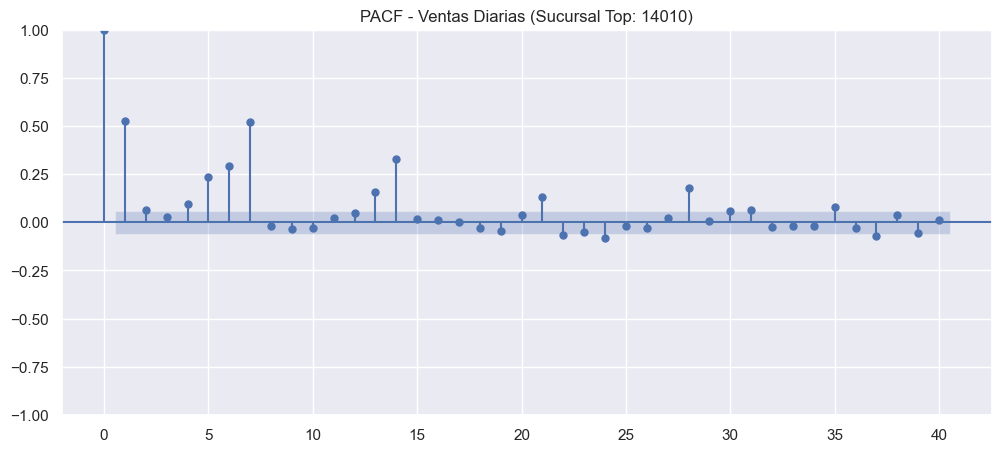


--- a.ii. PACF de Ventas Diarias (Top Producto) ---


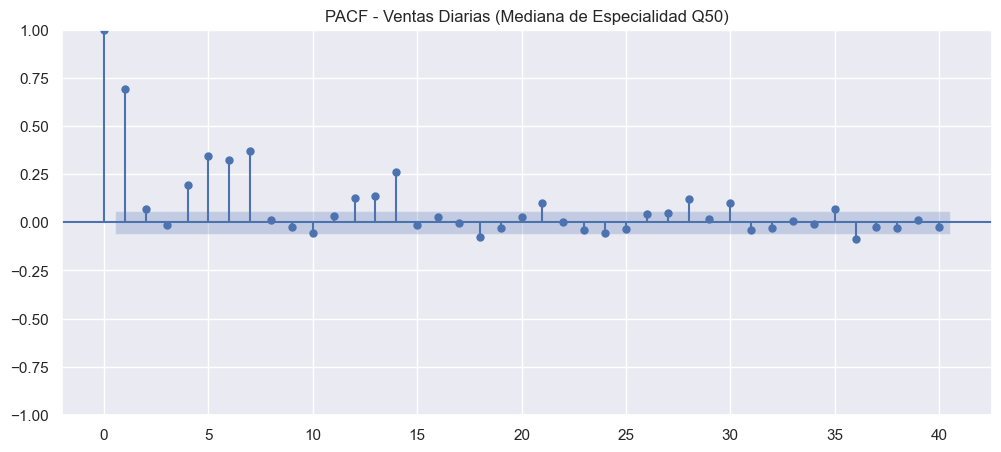


--- a.ii. PACF (Sucursal Top + Producto Top) ---


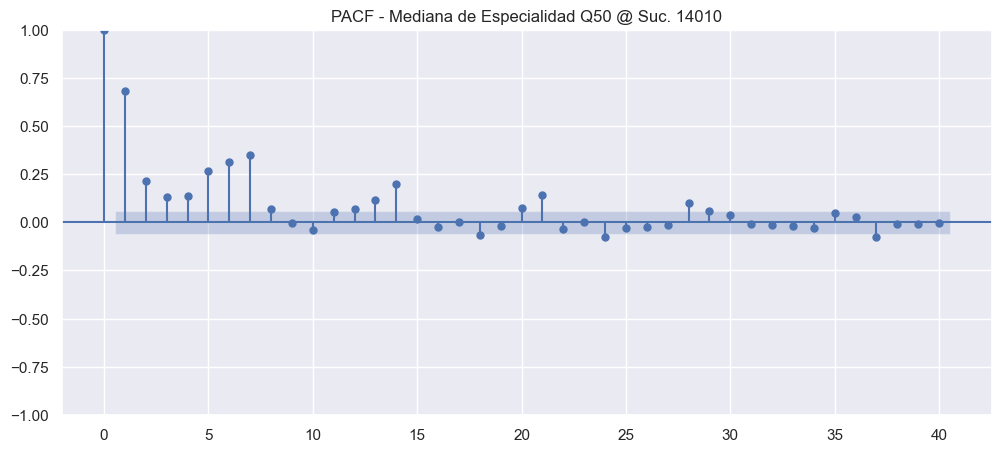

In [29]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_pacf
import pandas as pd

# --- 1. PACF para Ventas Totales ---
print("--- a.ii. PACF de Ventas Totales Diarias ---")
fig, ax = plt.subplots(figsize=(12, 5))
plot_pacf(ventas_por_dia, lags=40, ax=ax, method='ywm')
ax.set_title('Autocorrelación Parcial (PACF) - Ventas Totales Diarias')
plt.show()


# --- 2. PACF para la Sucursal MÁS Vendida ---
print("\n--- a.ii. PACF de Ventas Diarias (Top Sucursal) ---")
fig, ax = plt.subplots(figsize=(12, 5))
plot_pacf(ventas_top_sucursal_dia, lags=40, ax=ax, method='ywm')
ax.set_title(f'PACF - Ventas Diarias (Sucursal Top: {top_sucursal_id})')
plt.show()


# --- 3. PACF para el Producto MÁS Vendido ---
print("\n--- a.ii. PACF de Ventas Diarias (Top Producto) ---")
fig, ax = plt.subplots(figsize=(12, 5))
plot_pacf(ventas_top_producto_dia, lags=40, ax=ax, method='ywm')
ax.set_title(f'PACF - Ventas Diarias ({top_producto_nombre})')
plt.show()


# --- 4. PACF para la Combinación Top (Sucursal-Producto) ---
print(f"\n--- a.ii. PACF (Sucursal Top + Producto Top) ---")
fig, ax = plt.subplots(figsize=(12, 5))
plot_pacf(ventas_top_combo_dia, lags=40, ax=ax, method='ywm')
ax.set_title(f'PACF - {top_producto_nombre} @ Suc. {top_sucursal_id}')
plt.show()

## Interpretación de Gráficos ACF y PACF

Al analizar los gráficos de Autocorrelación (ACF) y Autocorrelación Parcial (PACF) de las diferentes series temporales, se observan los siguientes patrones:

### i. ¿Existen correlaciones significativas a diferentes rezagos?

**Sí, existen correlaciones muy significativas.**

* **ACF (Autocorrelación):** En todas las gráficas (Ventas Totales, Sucursal Top, Producto Top), el gráfico ACF muestra un **decaimiento muy lento**. Las barras permanecen muy por encima del intervalo de confianza durante muchos rezagos. Esto indica que la serie temporal tiene una **fuerte tendencia** (es *no estacionaria*); el valor de las ventas de hoy es extremadamente similar al de ayer, al de anteayer, y así sucesivamente.

* **PACF (Autocorrelación Parcial):** El gráfico PACF es más claro. Muestra picos significativos que se "cortan" (caen dentro del área azul) después de unos pocos rezagos.
    * Se observa un **pico muy fuerte en el rezago 1 (lag 1)**. Esto sugiere que, una vez eliminada la influencia de los rezagos intermedios, el valor de hoy tiene una fuerte dependencia directa del valor de *ayer*.
    * También se ven picos significativos en los rezagos 2, 3 y 4, aunque más pequeños.

### ii. ¿Se observa estacionalidad reflejada en patrones repetitivos?

**Sí, se observa una clara estacionalidad semanal.**

Tanto en los gráficos ACF como en los PACF, se pueden ver **picos significativos y repetitivos en los rezagos 7, 14, 21, 28, etc.**

* **Interpretación:** Esto confirma el patrón cíclico que vimos en las gráficas de barras. Existe una fuerte correlación entre las ventas de un día y las ventas del mismo día de la semana anterior (lag 7), de hace dos semanas (lag 14), y así sucesivamente.
* **Conclusión:** Esto indica que cualquier modelo de forecasting que se construya **debe** incluir un componente de **estacionalidad semanal (de 7 días)** para ser preciso.

# 10. Insights y conclusiones del EDA 

### a. Variables que Afectan Directamente las Ventas

Se identifican tres variables principales que tienen una influencia directa y medible sobre la `Venta_Neta_GTQ`:

* **`Fecha` (Temporal):** Esta es la variable más crítica. Las ventas no son aleatorias; demuestran patrones cíclicos muy fuertes (semanales, mensuales y anuales) que se repiten en el tiempo.
* **`No_Tienda` (Sucursal):** El desempeño no es uniforme entre sucursales. Existe una alta variabilidad, con tiendas "top" (como la `14000`) que dominan las ventas totales, indicando que la **ubicación** es un predictor clave.
* **`Descripcion_Cupon` (Producto/Promoción):** Las ventas están altamente concentradas en un conjunto de productos "estrella" (como "Mediana de Especialidad Q50"). Además, la variable imputada **"Sin Cupon"** ahora funciona como una característica importante que diferencia las transacciones.

### b. Patrones Útiles para el Modelo de Forecasting

El análisis reveló patrones estadísticos que son fundamentales para la construcción de un modelo preciso:

* **Fuerte Estacionalidad Semanal:** Este es el patrón más dominante. Los gráficos ACF/PACF muestran picos significativos en los rezagos 7, 14, 21, etc. Esto se confirma con la gráfica de barras, que muestra picos de ventas promedio los **sábados y domingos** y valles los martes. El modelo **debe** incluir un componente estacional de 7 días.
* **Estacionalidad Anual:** Se observa un ciclo anual claro, con picos de venta significativos en **diciembre** y caídas marcadas en **enero y febrero**.
* **Componente Autoregresivo (AR):** El gráfico PACF muestra un pico muy fuerte en el **rezago 1 (lag 1)**. Esto indica que las ventas de hoy están fuertemente correlacionadas con las ventas de ayer, sugiriendo que un término **AR(1)** será vital para el modelo.
* **Tendencia (No Estacionariedad):** El gráfico ACF muestra un decaimiento muy lento, lo cual es típico de una serie no estacionaria (con tendencia). Esto sugiere que el modelo probablemente necesitará **diferenciación** (el componente "I" o 'd' en un modelo ARIMA).
* **Outliers (Anomalías):** Los diagramas de caja (box plots) revelan que los "outliers" (ventas muy altas) no son errores, sino una característica normal del negocio (ej. pedidos grandes). El modelo no debe ignorarlos, sino ser robusto ante ellos.

### c. Calidad y Preparación del Dataset

* **Calidad de Datos:** La calidad del dataset es **alta**. Los valores que inicialmente parecían faltantes (~10.8%) fueron identificados como transacciones "Sin Cupon", lo cual es información valiosa. Los 4 valores nulos restantes en `Tipo_Pago` fueron imputados exitosamente con la moda.
* **Preparación:** Tras la imputación, el dataset se considera **limpio, completo y consistente**. Los tipos de datos han sido validados (`datetime` para `Fecha`, numéricos para ventas, y `object` para categorías).

In [30]:
import os
from pathlib import Path

# --- 1. Definir la ruta raíz del proyecto ---
PROJECT_ROOT = Path.cwd().parent

# --- 2. Definir la ruta de datos procesados ---
PROCESSED_DATA_PATH = PROJECT_ROOT / "data" / "processed"

# --- 3. Crear el directorio ---
PROCESSED_DATA_PATH.mkdir(parents=True, exist_ok=True)

# --- 4. Definir el nombre del archivo limpio ---
CLEAN_DATA_FILEPATH = PROCESSED_DATA_PATH / "ventas_limpio.csv"

# --- 5. Guardar el DataFrame limpio (df) ---
print(f"Forma del DataFrame limpio: {df.shape}")
print(f"Guardando datos limpios en: {CLEAN_DATA_FILEPATH}")

df.to_csv(CLEAN_DATA_FILEPATH, index=False)

print("¡Archivo limpio guardado exitosamente!")

Forma del DataFrame limpio: (490414, 14)
Guardando datos limpios en: c:\Users\gabri\OneDrive\Documents\Product Development\repo-sales-forecasting-project\data\processed\ventas_limpio.csv
¡Archivo limpio guardado exitosamente!
